# Introduction
This project is aimed to explore the relationship between the budgets and the box offices of films, and finally build a linear model to predict the box office of the film based on its budget.

Data Resources: [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018

<img src=https://cdn-images-1.medium.com/v2/resize:fit:1000/1*6PoPJ52aM57gkN7oL7qDOw.jpeg>

image source: [owentemple.com](https://cdn-images-1.medium.com/v2/resize:fit:1000/1*6PoPJ52aM57gkN7oL7qDOw.jpeg)

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [ ]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [ ]:
print(data.shape)
print(data.isna().values.any())
print(data.duplicated().values.any())
data.info()
data.head()

(5391, 6)
False
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [ ]:
# check the number of duplicates by creating a subset of the data
duplicated_rows = data[data.duplicated()]
print(duplicated_rows)

Empty DataFrame
Columns: [Rank, Release_Date, Movie_Title, USD_Production_Budget, USD_Worldwide_Gross, USD_Domestic_Gross]
Index: []


### Data Type Conversions

**Cleaning**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`.
<br>
<br>

In [ ]:
symbol_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']

for col in columns_to_clean:
    for sym in symbol_to_remove:
        # replace each characer with an empty string
        data[col] = data[col].astype(str).str.replace(sym, '')
    # convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])

**Further Cleaning**: Convert the `Release_Date` column to a Pandas Datetime type.

In [ ]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
type(data['Release_Date'][2])

pandas._libs.tslibs.timestamps.Timestamp

### A Brief Description of the Data

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [ ]:
print(data.describe())
print(data[data.USD_Production_Budget == 1100.00])
print(data[data.USD_Production_Budget == 425000000.00])


print(f'The average production budget is: {data.USD_Production_Budget.mean()}')
print(f'The average worldwide gross revenue is: {data.USD_Worldwide_Gross.mean()})')
print(f'The minimum worldwide revenue is: {data.USD_Worldwide_Gross.min()}')

          Rank                   Release_Date  USD_Production_Budget  \
count 5,391.00                           5391               5,391.00   
mean  2,696.00  2003-09-19 15:02:02.203672704          31,113,737.58   
min       1.00            1915-08-02 00:00:00               1,100.00   
25%   1,348.50            1999-12-02 12:00:00           5,000,000.00   
50%   2,696.00            2006-06-23 00:00:00          17,000,000.00   
75%   4,043.50            2011-11-23 00:00:00          40,000,000.00   
max   5,391.00            2020-12-31 00:00:00         425,000,000.00   
std   1,556.39                            NaN          40,523,796.88   

       USD_Worldwide_Gross  USD_Domestic_Gross  
count             5,391.00            5,391.00  
mean         88,855,421.96       41,235,519.44  
min                   0.00                0.00  
25%           3,865,206.00        1,330,901.50  
50%          27,450,453.00       17,192,205.00  
75%          96,454,455.00       52,343,687.00  
max     

# Investigating the Zero Revenue Films

How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [ ]:
print(data[data.USD_Domestic_Gross == 0].describe())
data[(data.USD_Production_Budget == 175000000) &
     (data.USD_Domestic_Gross == 0)] # Use & operator to combine conditions

          Rank         Release_Date  USD_Production_Budget  \
count   512.00                  512                 512.00   
mean  4,159.29  2010-11-06 12:33:45           7,864,931.55   
min      96.00  1916-05-09 00:00:00               1,400.00   
25%   3,564.50  2009-12-31 00:00:00             647,500.00   
50%   4,522.50  2013-12-31 00:00:00           2,300,000.00   
75%   5,022.25  2015-05-26 18:00:00           8,825,000.00   
max   5,390.00  2020-12-31 00:00:00         175,000,000.00   
std   1,136.37                  NaN          15,798,626.84   

       USD_Worldwide_Gross  USD_Domestic_Gross  
count               512.00              512.00  
mean          2,775,917.11                0.00  
min                   0.00                0.00  
25%                   0.00                0.00  
50%                   0.00                0.00  
75%              27,933.25                0.00  
max          83,833,602.00                0.00  
std          10,169,352.58                0.00  


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0


How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [ ]:
print(data[data.USD_Worldwide_Gross == 0].describe())
print(data[(data.USD_Production_Budget == 175000000) &
           (data.USD_Worldwide_Gross == 0)])

          Rank                   Release_Date  USD_Production_Budget  \
count   357.00                            357                 357.00   
mean  4,444.68  2010-04-24 09:08:34.285714176           5,815,404.99   
min      96.00            1916-05-09 00:00:00               1,400.00   
25%   4,148.00            2009-12-31 00:00:00             500,000.00   
50%   4,751.00            2014-05-12 00:00:00           1,500,000.00   
75%   5,108.00            2015-06-10 00:00:00           4,400,000.00   
max   5,390.00            2020-12-31 00:00:00         175,000,000.00   
std     995.70                            NaN          16,262,169.21   

       USD_Worldwide_Gross  USD_Domestic_Gross  
count               357.00              357.00  
mean                  0.00                0.00  
min                   0.00                0.00  
25%                   0.00                0.00  
50%                   0.00                0.00  
75%                   0.00                0.00  
max     

### Filtering on Multiple Conditions

In [ ]:
international_releases = data.loc[(data.USD_Domestic_Gross == 0) &
                                  (data.USD_Worldwide_Gross != 0)]
print(f'Number of international releases: {len(international_releases)}')
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

Now I identify:
* Which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office?

And finally:
* Create another DataFrame called data_clean that does not include these films.

In [ ]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [ ]:
not_yet_released = data[data.Release_Date >= scrape_date]
print(f'Number of future releases: {len(not_yet_released)}')
not_yet_released

Number of future releases: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [ ]:
# remove the above films to clean the data
data_cleaned = data.drop(not_yet_released.index)

### Films that Lost Money

What is the percentage of films where the production costs exceeded the worldwide gross revenue?

In [ ]:
loss = data_cleaned[data_cleaned.USD_Production_Budget > data_cleaned.USD_Worldwide_Gross]
print(f'Percentage of films where the production costs exceeded the worldwide gross revenue: \
{round(len(loss) / len(data_cleaned)* 100,2)}%')

Percentage of films where the production costs exceeded the worldwide gross revenue: 37.28%


# Seaborn for Data Viz: Bubble Charts

In [ ]:
import seaborn as sns

Now I create a bubble chart to visually illustrate the scatterplot of Budget vs. Year, and use the hue_label to demonstrate the USD_Worldwide_Gross:

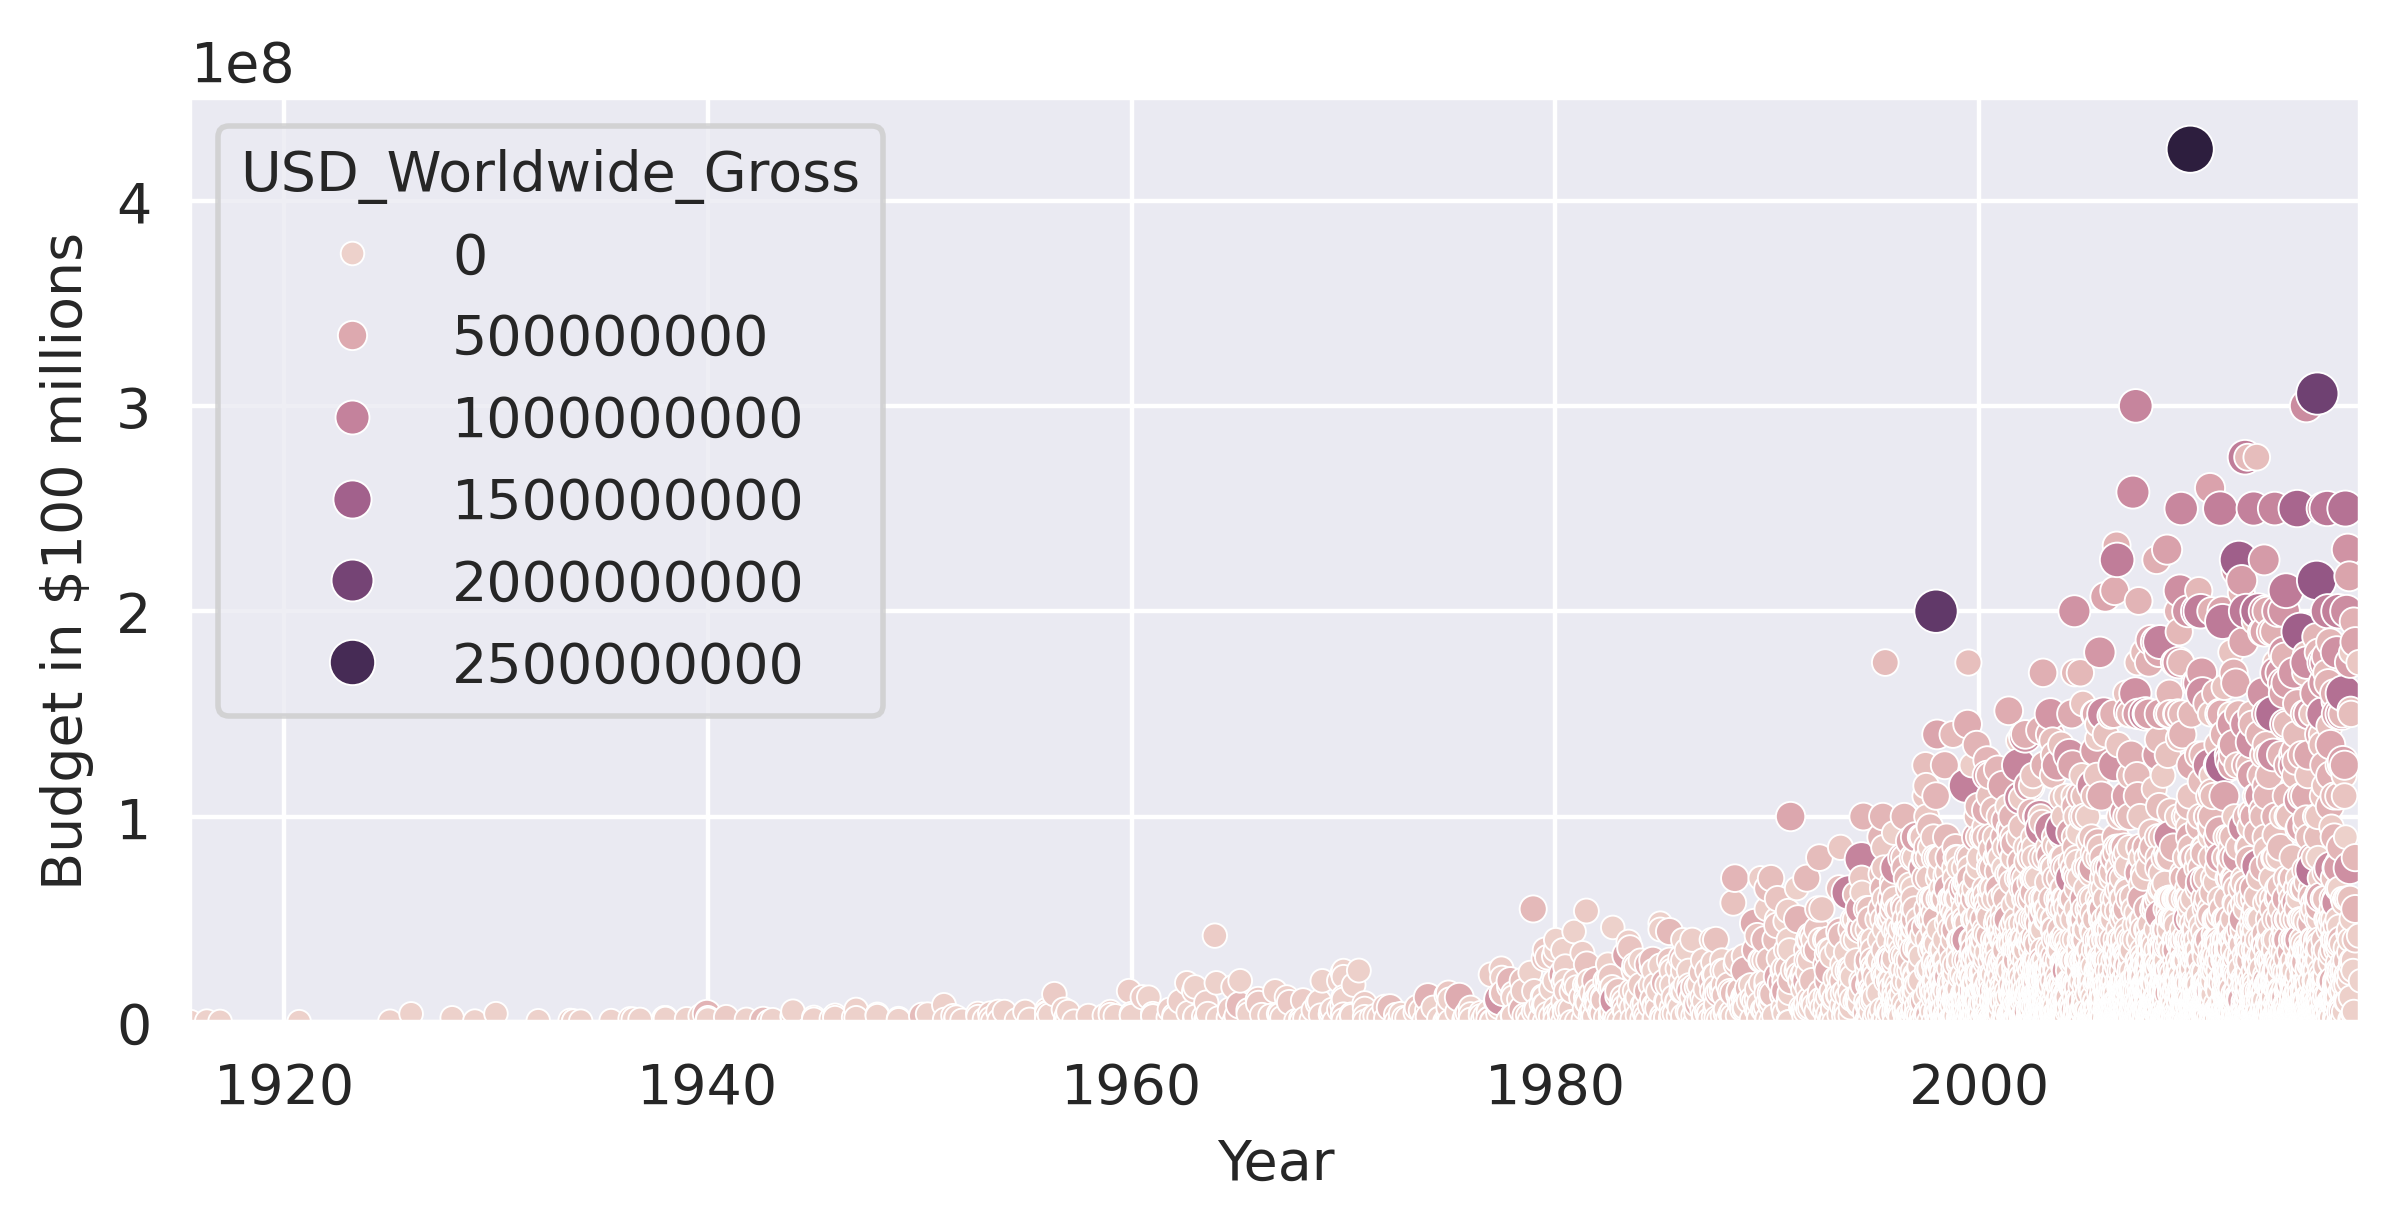

In [ ]:
plt.figure(figsize=(7,3), dpi=400)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_cleaned,
                    x='Release_Date',
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)

    ax.set(ylim=(0, 450000000),
           xlim=(data_cleaned.Release_Date.min(), data_cleaned.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')

# Converting Years to Decades

In [ ]:
dt_index = pd.DatetimeIndex(data_cleaned.Release_Date)
years = dt_index.year
decades = years//10*10 # because the round down division // brings any year
                       # to a whole number in three digits, multiply by ten we get the desired decaade
data_cleaned['Decade'] = decades
data_cleaned.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

Create two new DataFrames: `old_films` and `new_films`
* `old_films` includes all the films before 1969 (up to and including 1969)
* `new_films` includes all the films from 1970 onwards

In [60]:
old_films = data_cleaned[data_cleaned.Decade <= 1960]
new_films = data_cleaned[data_cleaned.Decade > 1960]
old_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


# Seaborn Regression Plots

Now I use Seaborn to explore the linear relationship between the 'USD_Production_Budget' and the 'USD_Worldwide_Gross'

By dividing the 'Decade' into two group, I create two graph showing the above relationships focus on the movie before 1960s and after 1960s:

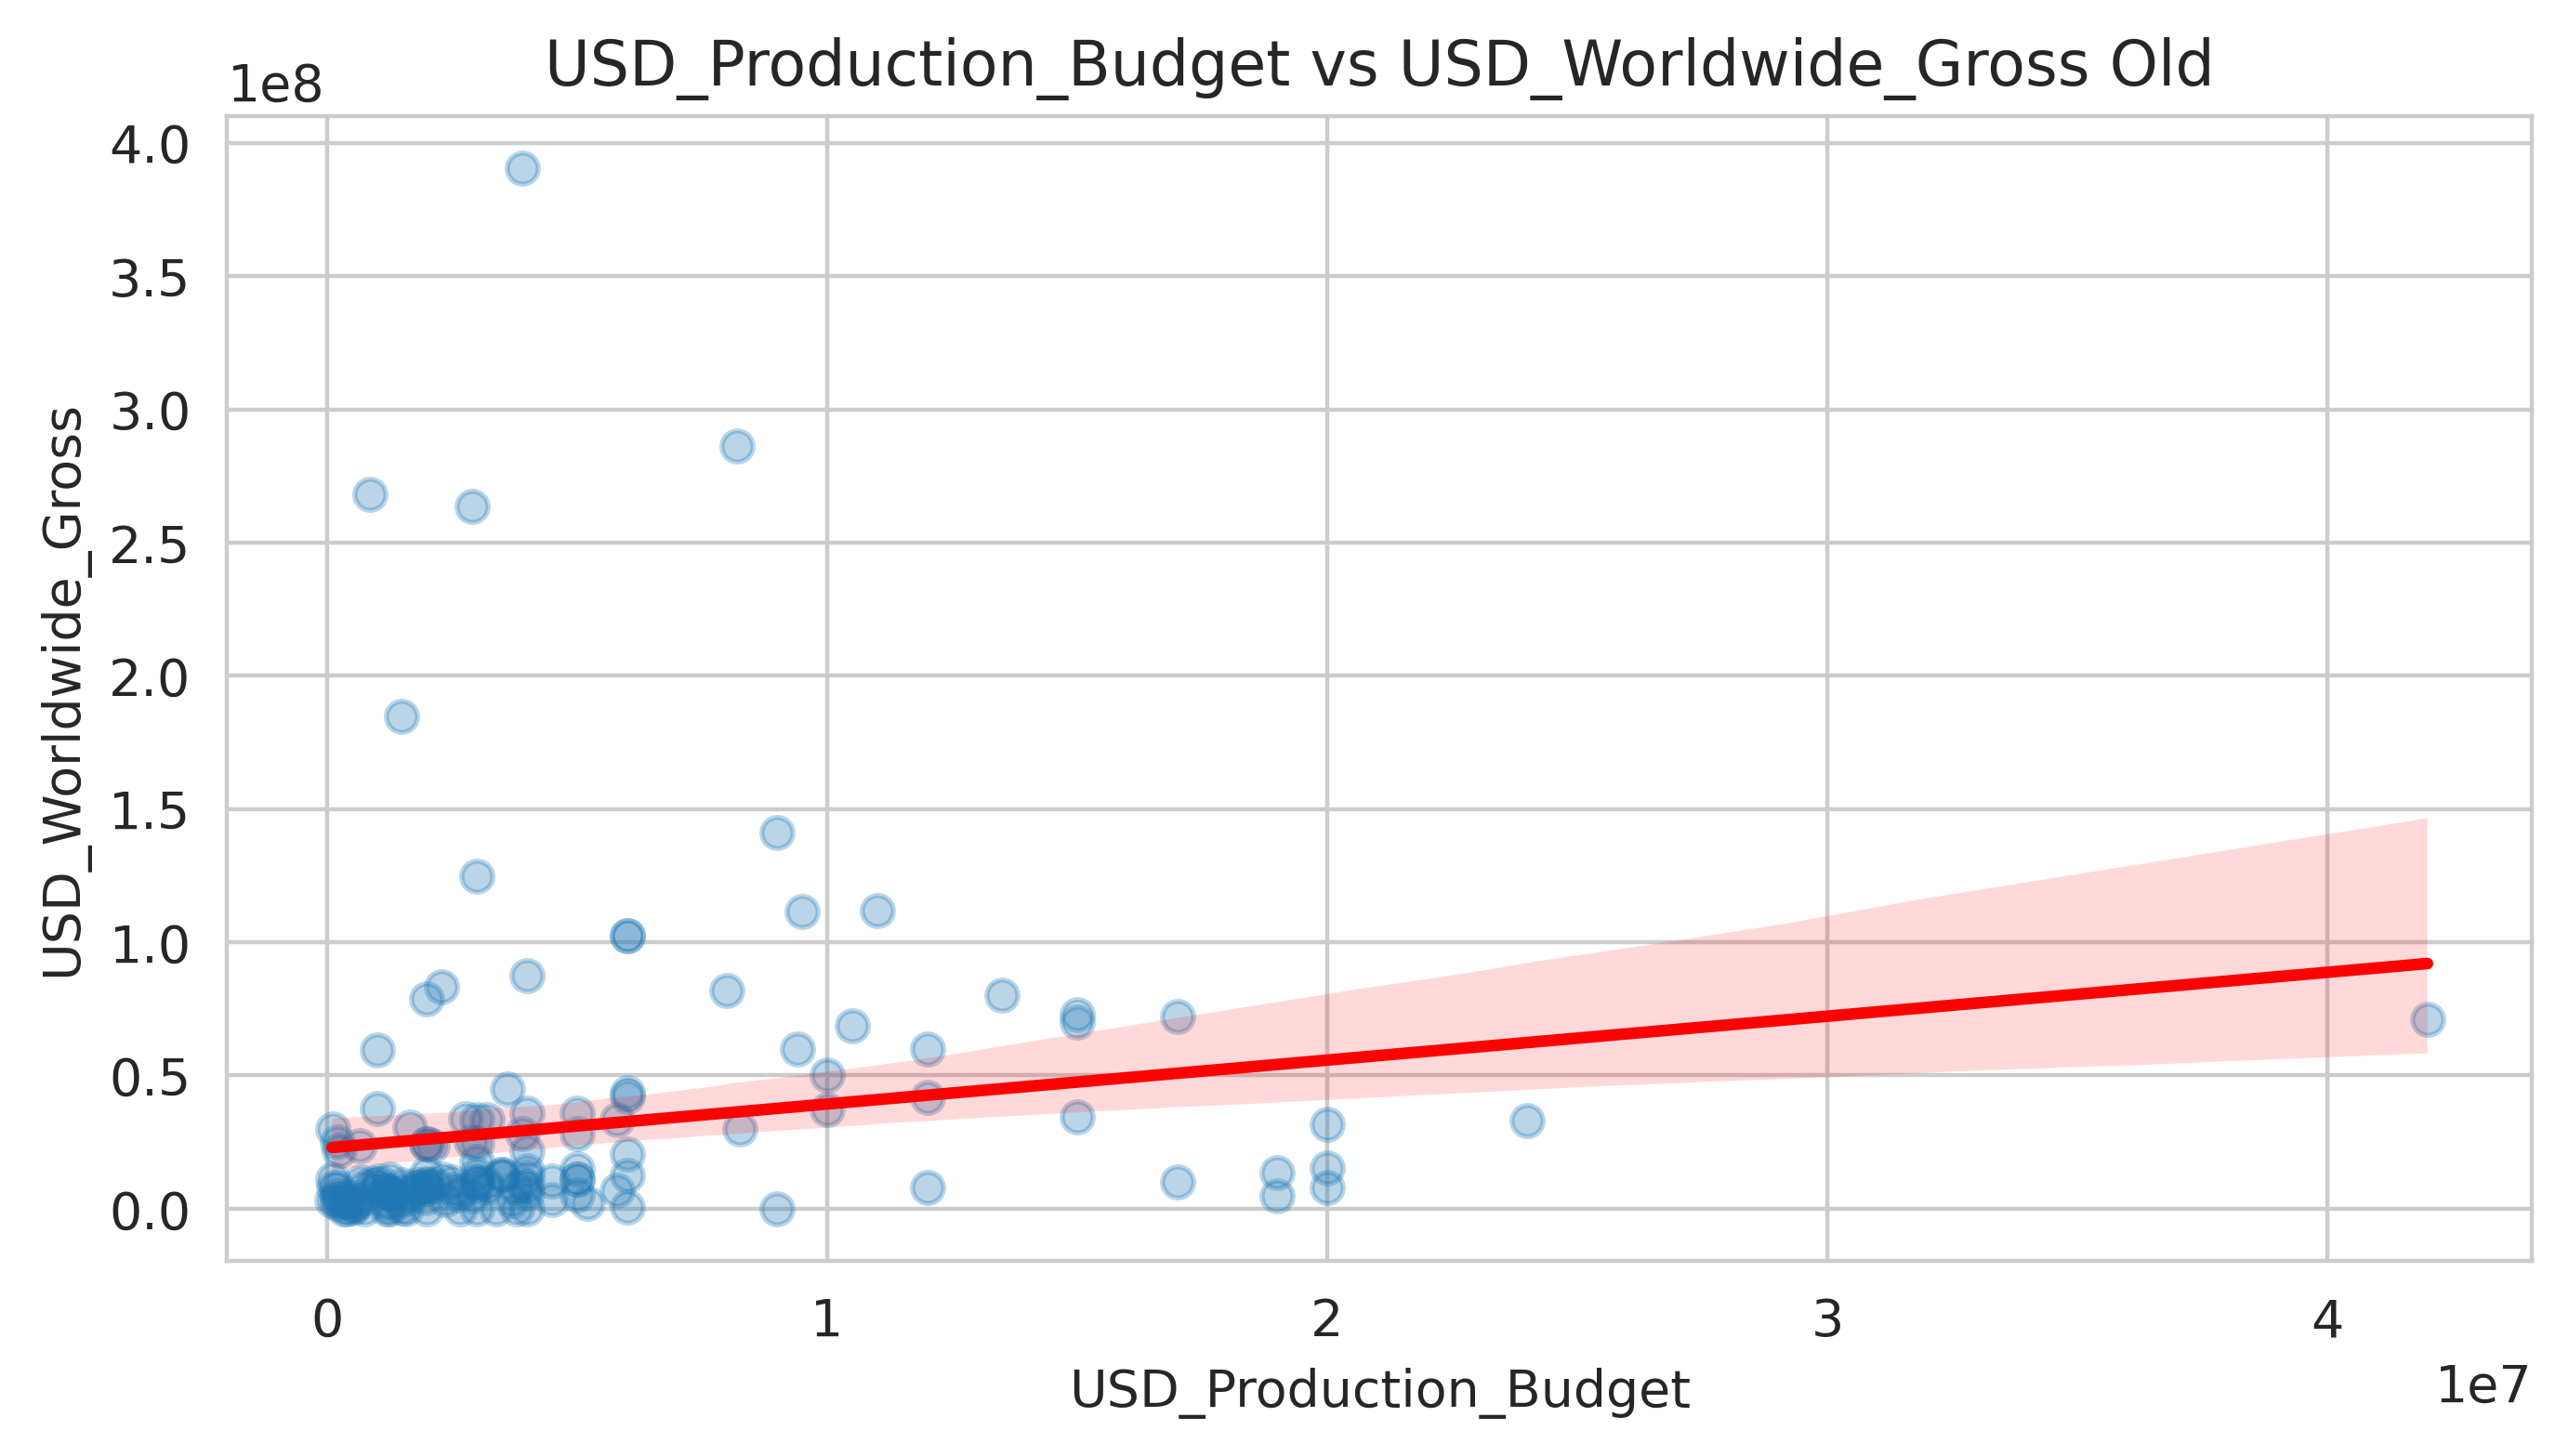

In [61]:
plt.figure(figsize=(8,4), dpi=400)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films,
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.3},
            line_kws = {'color': 'red'})
  plt.title("USD_Production_Budget vs USD_Worldwide_Gross Old")
plt.show()

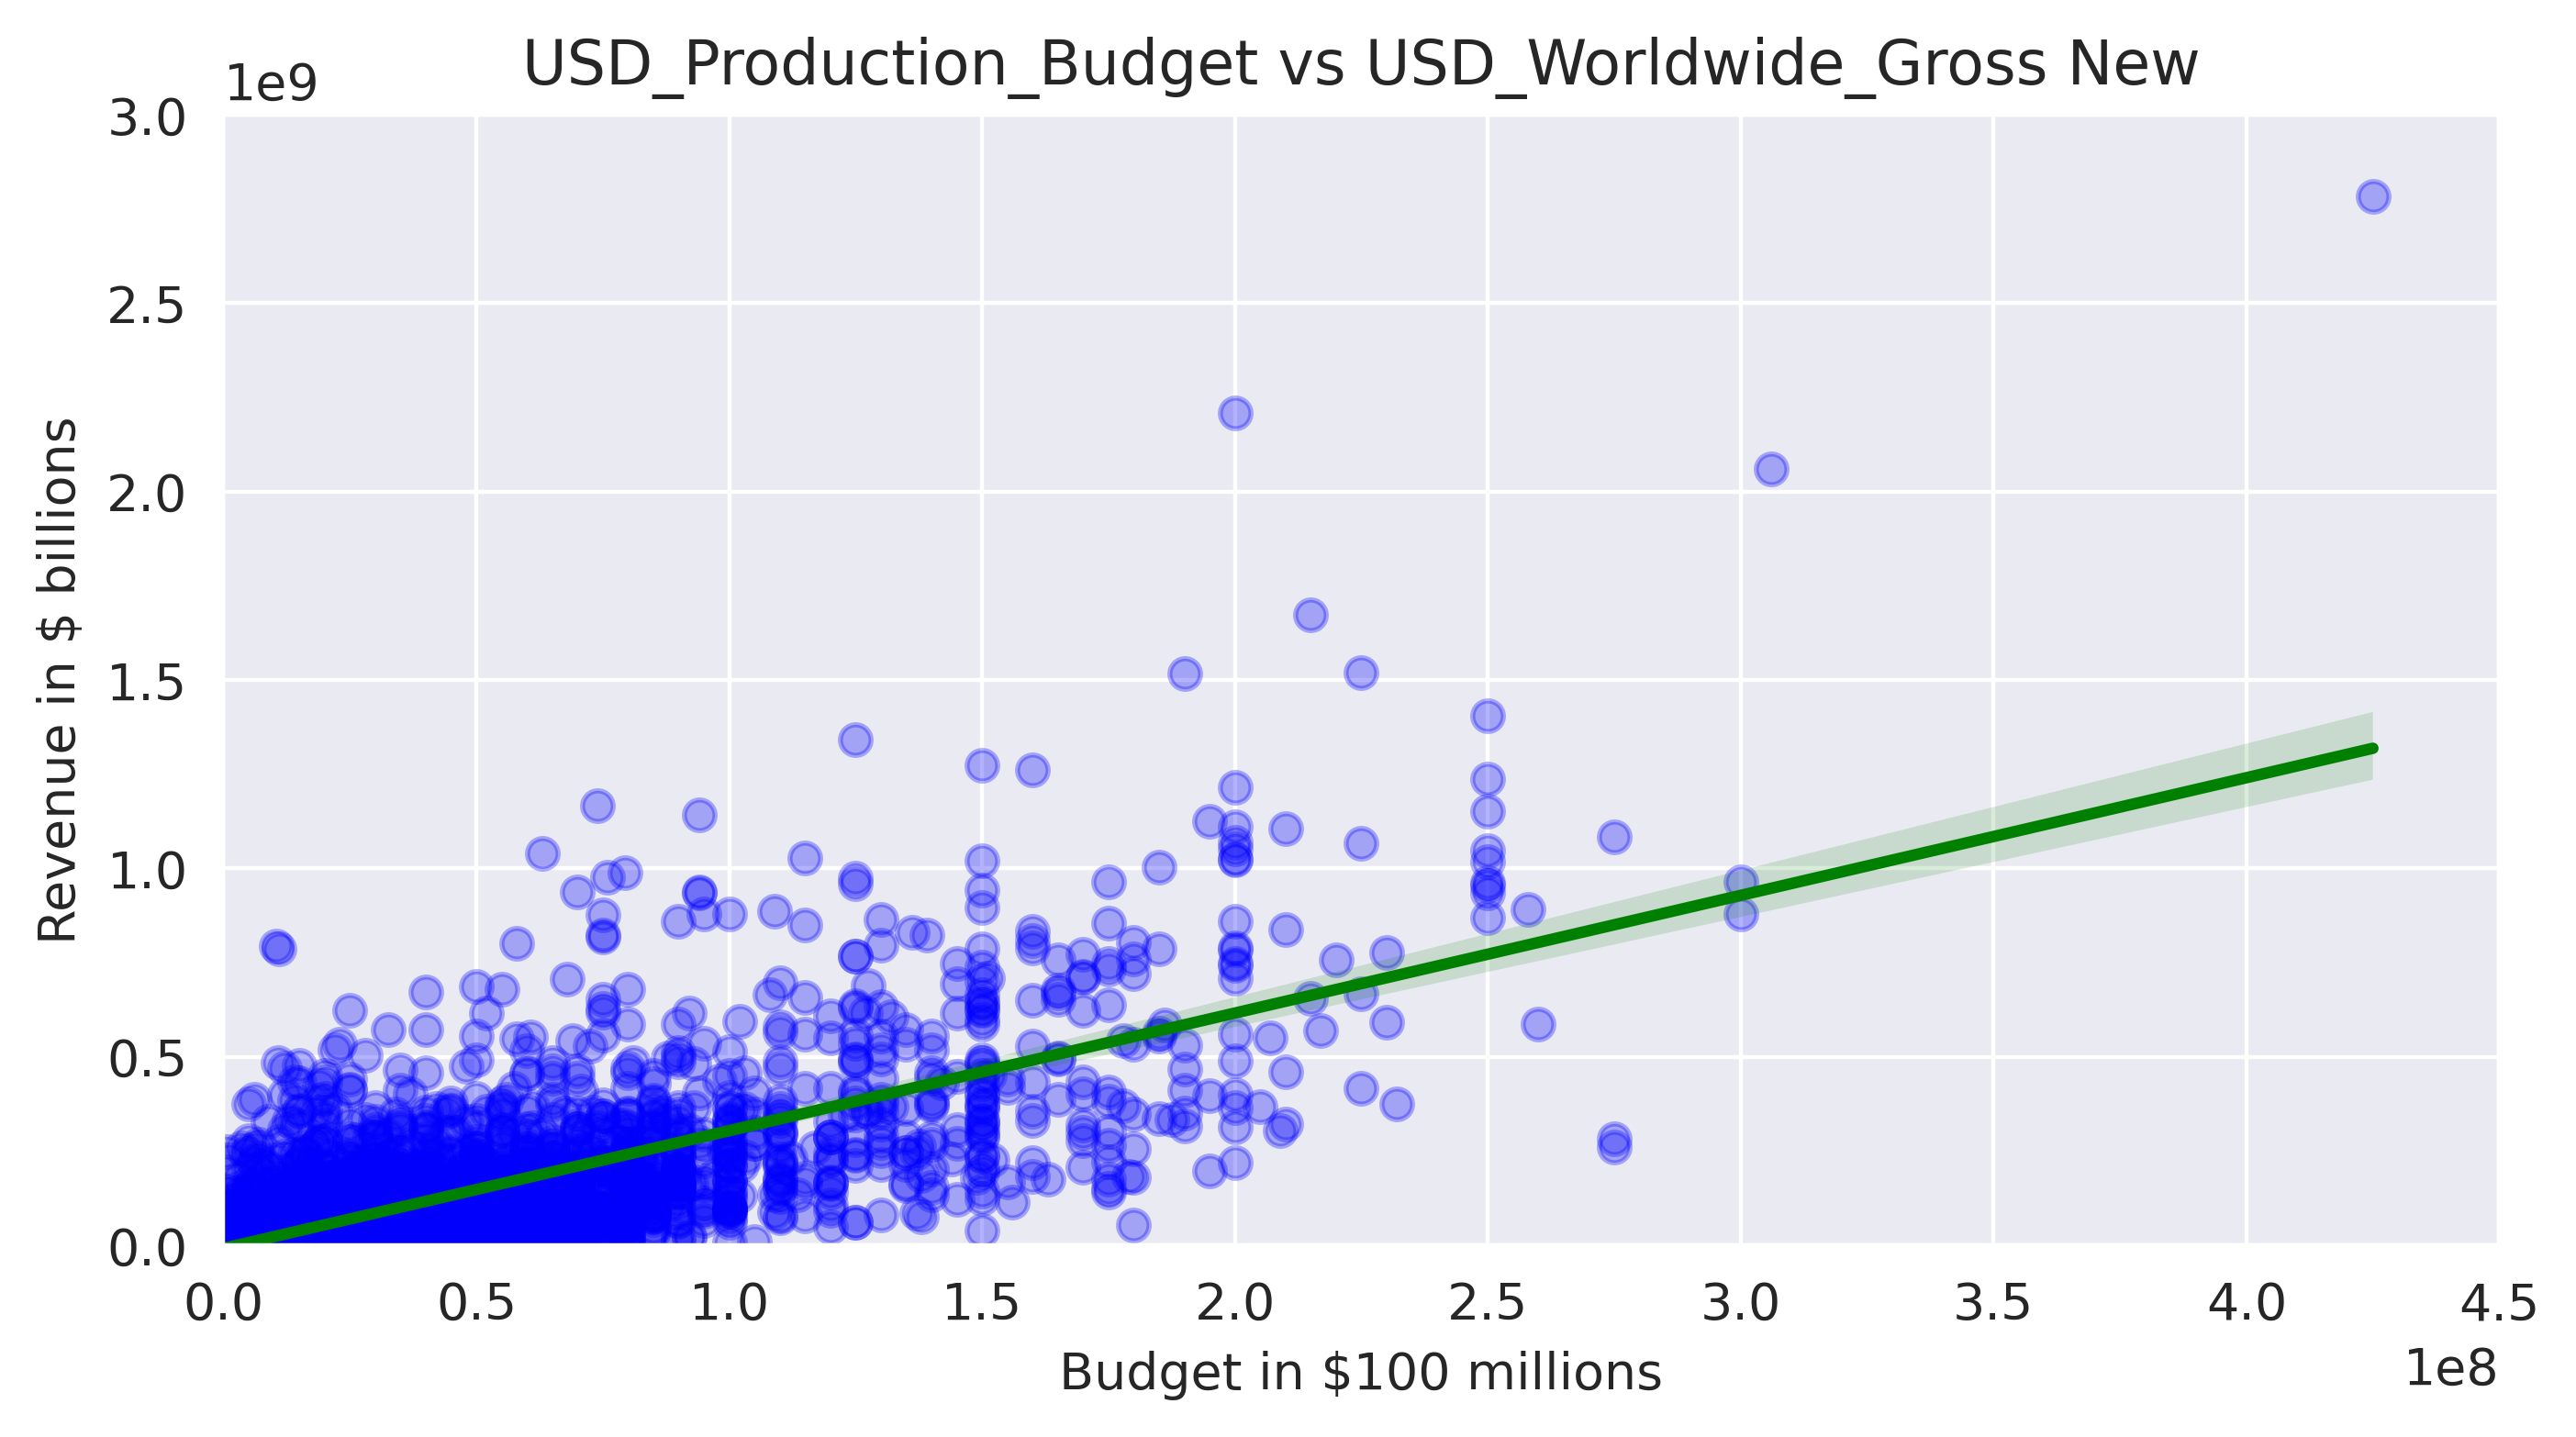

In [62]:
plt.figure(figsize=(8,4), dpi=400)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='blue',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': 'green'})
  plt.title("USD_Production_Budget vs USD_Worldwide_Gross New")

  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

# Predictive Linear Model

$$ Revenue = \theta _0 + \theta _1 BUDGET$$

In [63]:
from sklearn.linear_model import LinearRegression

Now I use scikit-learn to analyse the DataFrame of old film, cumputing $\theta _0$, $\theta _1$, and r-squared value.

In [64]:
regression = LinearRegression()

In [65]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])

# Find the best-fit line
regression.fit(X, y)

# theta 0
print(f' the intercept is: {regression.intercept_}')

# theta 1
print(f' the slope is: {regression.coef_}')

# r-squared
print(f' the r-squared is: {regression.score(X, y)}')

 the intercept is: [22821538.63508039]
 the slope is: [[1.64771314]]
 the r-squared is: 0.02937258620576877


# Predicting in Action
The above are the estimated the slope and intercept. Recall that our Linear Model has the following form:

$$ Revenue = \theta _0 + \theta _1 BUDGET$$

Let the budget be 2.7 million, what is the predicted box office?

In [66]:
budget = 270000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f'The estimated revenue for a 2.7 million film is around ${revenue_estimate:.10}.')

The estimated revenue for a 2.7 million film is around $468000000.0.
